In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [44]:
df = pd.read_csv("CarMotoPrice.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [46]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [47]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Prétraitement des données

In [48]:
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
for col in categorical_features:
    df[col] = df[col].astype('category')
    print(col, df[col].cat.categories)

Fuel_Type Index(['CNG', 'Diesel', 'Petrol'], dtype='object')
Seller_Type Index(['Dealer', 'Individual'], dtype='object')
Transmission Index(['Automatic', 'Manual'], dtype='object')


In [49]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [50]:
df.Fuel_Type.replace({'Petrol':0, 'Diesel':1, 'CNG':2}, inplace=True)
df.Seller_Type.replace({'Dealer':0, 'Individual':1}, inplace=True)
df.Transmission.replace({'Manual':0, 'Automatic':1}, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [51]:
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
Y = df['Selling_Price']

## Visualisation et distribution des données

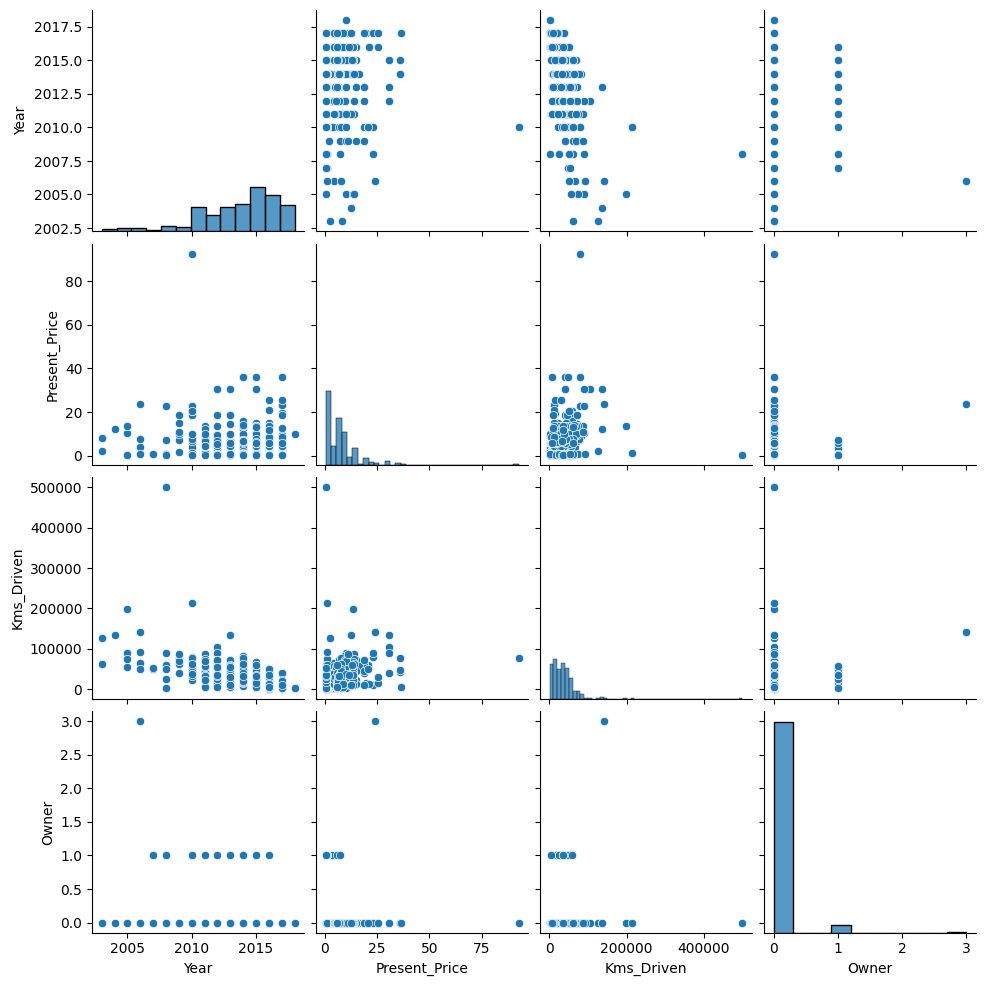

In [52]:
sns.pairplot(X)

C:\Users\oussa.000\AppData\Local\Temp\ipykernel_15164\1804214126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(Y,orient="h", palette="Set3")


<Axes: xlabel='Selling_Price'>

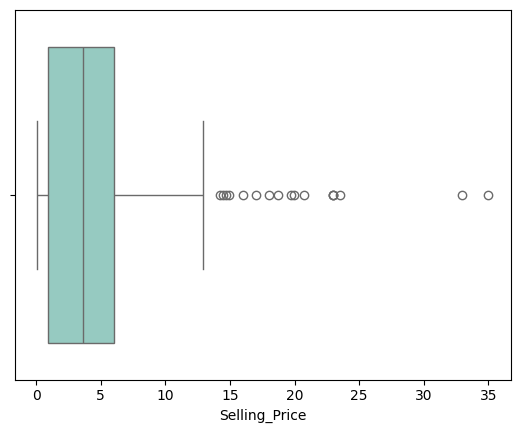

In [53]:
sns.boxplot(Y,orient="h", palette="Set3")

## Machine Learning: Regression Linéaire

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state=0)

In [56]:
reg_fit = reg.fit(X_train, Y_train)

## Evaluation du modèle

In [57]:
y_pred = reg.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
print(mse)
r2 = r2_score(Y_test, y_pred)
print(r2)

2.1885564456578535
0.9134181721224441
